In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [50]:
train_df = pd.read_csv("../data/train.csv",dtype={'StateHoliday': object})
test_df = pd.read_csv("../data/test.csv")
store_df = pd.read_csv("../data/store.csv")

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [53]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [54]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [61]:
test_df.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.000,1,0,0,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.000,1,0,0,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.000,1,0,0,a,c,24000.000,4.000,2013.000,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.000,1,0,0,a,a,7520.000,10.000,2014.000,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.000,1,0,0,a,c,2030.000,8.000,2000.000,0,NaN,NaN,NaN


In [55]:
store_df.shape, train_df.shape, test_df.shape

((1115, 10), (1017209, 9), (41088, 8))

Merge store dataframe to train and test dataframes

In [56]:
train_df = pd.merge(train_df, store_df, how = 'left', on = 'Store')
test_df = pd.merge(test_df, store_df, how = 'left', on = 'Store')

In [57]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1014567.000,693861.000,693861.000,1017209.000,509178.000,509178.000
mean,558.430,3.998,5773.819,633.146,0.830,0.382,0.179,5430.086,7.223,2008.690,0.501,23.269,2011.753
std,321.909,1.997,3849.926,464.412,0.376,0.486,0.383,7715.324,3.212,5.993,0.500,14.096,1.663
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,280.000,2.000,3727.000,405.000,1.000,0.000,0.000,710.000,4.000,2006.000,0.000,13.000,2011.000
50%,558.000,4.000,5744.000,609.000,1.000,0.000,0.000,2330.000,8.000,2010.000,1.000,22.000,2012.000
75%,838.000,6.000,7856.000,837.000,1.000,1.000,0.000,6890.000,10.000,2013.000,1.000,37.000,2013.000
max,1115.000,7.000,41551.000,7388.000,1.000,1.000,1.000,75860.000,12.000,2015.000,1.000,50.000,2015.000


Remove Id column from test dataframe

In [58]:
ID = test_df['Id']
test_df.drop('Id',inplace=True,axis=1)

In [59]:
test_df.describe()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000,41088.000,41077.000,41088.000,41088.000,40992.000,25872.000,25872.000,41088.000,23856.000,23856.000
mean,555.900,3.979,0.854,0.396,0.443,5088.583,7.035,2008.642,0.581,24.427,2011.821
std,320.274,2.015,0.353,0.489,0.497,7225.487,3.143,6.862,0.493,14.161,1.692
min,1.000,1.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,279.750,2.000,1.000,0.000,0.000,720.000,4.000,2006.000,0.000,13.000,2011.000
50%,553.500,4.000,1.000,0.000,0.000,2425.000,7.000,2010.000,1.000,22.000,2012.000
75%,832.250,6.000,1.000,1.000,1.000,6480.000,9.000,2012.000,1.000,37.000,2013.000
max,1115.000,7.000,1.000,1.000,1.000,75860.000,12.000,2015.000,1.000,49.000,2015.000


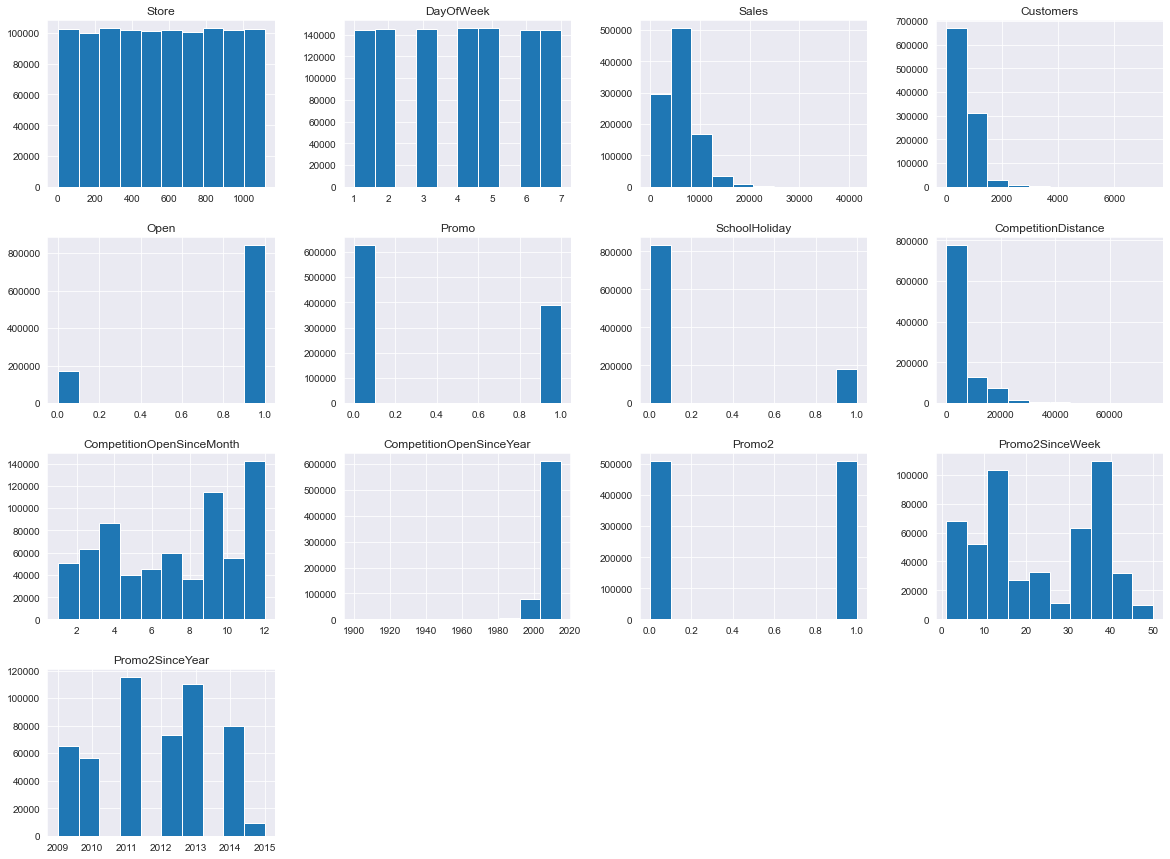

In [60]:
#Numerical Features Histograms (Train)
num_feats = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_df[num_feats].hist(figsize=(20,15));